<div style="text-align: center;">
    
# Oficina 3: Plano de preparação de dados para modelo preditivo
    
</div>

<div style="text-align: justify;">

Você é um analista de dados em uma grande empresa de varejo on-line que acaba de concluir uma campanha de marketing direcionada. A empresa coletou diversos dados sobre os clientes, incluindo informações demográficas, comportamento de compra e respostas à campanha. Agora, sua tarefa é preparar esse conjunto de dados para construir um modelo preditivo que ajudará a empresa a segmentar melhor seus clientes em campanhas futuras.

O conjunto de dados contém algumas inconsistências, valores faltantes e variáveis categóricas que precisam ser tratadas para garantir que o modelo preditivo seja preciso e eficaz, conforme apresentado na tabela abaixo:
    
</div>

[Audiodescrição: Tabela com sete colunas (“Cliente ID”, “Idade”, “Gênero”, “Renda Anual [R$]”, “Localização”, “Compras Anteriores” e “Resposta à Campanha”) e 10 linhas, com a ID de cada cliente sendo numerada de 1 a 10. Os dados variam, mas certos clientes possuem valores não informados. Por exemplo: o cliente de ID “3” informou todos os dados exceto renda anual; o cliente de ID “4” informou todos os dados exceto compras anteriores; o cliente de ID “5” informou todos os dados exceto gênero; o cliente de ID “6” informou todos os dados exceto idade; e, por fim, o cliente de ID “9” informou todos os dados exceto renda anual.]


 # **Sumário**
 
 - [0.Imports](#Imports)
     - [0.1.Formatação da Página](#Formatacao)
     - [0.2.Construção/Coleta dos Dados](#Coleta)
 - [1.Entendimento do Negócio:](#negocio)

<a id="Imports"></a>
# 0.Imports

In [3]:
# Formatação da página: 
from IPython.core.display import HTML

# Manipulação de dados:
import pandas as pd 
import numpy  as np

# Gráficos:
import matplotlib.pyplot as plt
import seaborn as sns

# Garantir que os gráficos apareçam no Jupyter Notebook
%matplotlib inline

# Separar os dados em treino e teste
from sklearn.model_selection import train_test_split

# Modelo para fazer a previsão dos valores faltantes na var Gênero
from sklearn.ensemble import RandomForestClassifier

# Observação sobre a imputação dos valores / numéricos faltantes 
from sklearn.impute import SimpleImputer

# Transformação de variáveis categóricas
from sklearn.preprocessing import LabelEncoder


<a id="Formatacao"></a>
## 0.1.Formatação da Página

In [4]:
# Código de Cores ANSI
# Para prints no código
azul = "\033[38;2;10;31;68m"
verde = "\033[38;5;82m"
verde_escuro = "\033[38;2;0;100;0m"
laranja = "\033[38;5;208m"
reset = '\033[0m'

HTML('''
<style>
    /* Aplicar fonte monoespaçada a todo o notebook */
    body, div.text_cell_render, div.code_cell pre, h1, h2, h3, h4, p {
        font-family: "Courier New", Consolas, Monaco, monospace; /* Fonte monoespaçada */
    }
    
    /* Estilo para h1 */
    h3{ 
        color: #0a1f44;            /* Cor do texto (azul marinho) */
        background-color: #dcdde1; /* Fundo azul escuro (cinza mais escuro) */
        border-radius: 8px;        /* Bordas arredondadas */
        padding: 10px;
    }
    
    /* Estilo para h2 */
    h1{
        color: #dcdde1;            /* Cor do texto (cinza claro) */
        background-color: #0a1f44; /* Fundo azul escuro (azul marinho) */
        border-radius: 8px;        /* Bordas arredondadas */
        padding: 10px;
    }
    
    /* Estilo para h3 */
    h2{
        color:#dcdde1;            /* Cor do texto (azul mais claro) */
        background-color: #40739e; /* Fundo azul escuro (cinza mais escuro) */
        border-radius: 8px;        /* Bordas arredondadas */
        padding: 10px;
    }
    
    /* Estilo para h4 e h5 */
    h4, h5 {
        background-color:#40739e;  /* Fundo azul marinho */
        color: white;               /* Texto branco */
        border-radius: 8px;         /* Bordas arredondadas */
        padding: 10px;
    }
</style>
''')

<a id="Coleta"></a>
## 0.2.Construção/Coleta dos dados

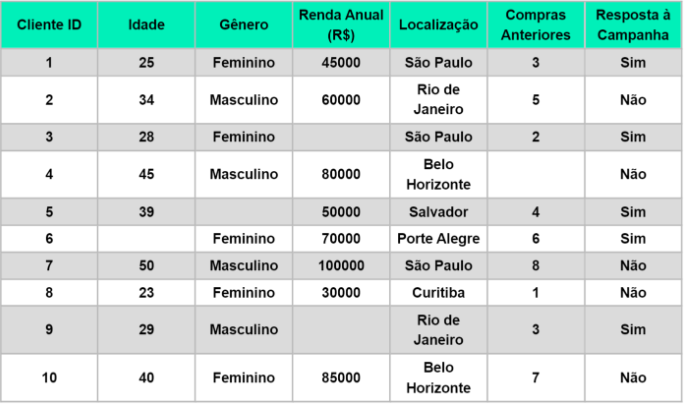

In [7]:
# Dados
data = {
    "Cliente ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Idade": [25, 34, 28, 45, 39, np.nan, 40, 50, 23, 29],
    "Gênero": ["Feminino", "Masculino", "Feminino", "Masculino", np.nan, "Feminino", "Feminino", "Masculino", "Feminino", "Masculino"],
    "Renda Anual (R$)": [45000, 60000, np.nan, 45000, 80000, 50000, 70000, 100000, 30000, np.nan],
    "Localização": ["São Paulo", "Rio de Janeiro", "São Paulo", "Belo Horizonte", "Salvador", "Porto Alegre", "São Paulo", "Curitiba", "Rio de Janeiro", "Belo Horizonte"],
    "Compras Anteriores": [3, 5, 2, np.nan, 7, 4, 6, 8, 1, 3],
    "Resposta à Campanha": ["Sim", "Não", "Sim", "Não", "Sim", "Sim", "Não", "Sim", "Sim", "Não"]
}

In [8]:
# Criando um dataframe:
df = pd.DataFrame(data)

In [9]:
# Aoresentando as primeiras linhas do conjunto de dados:
df.head()

,Cliente ID,Idade,Gênero,Renda Anual (R$),Localização,Compras Anteriores,Resposta à Campanha
0,1,25.0,Feminino,45000.0,São Paulo,3.0,Sim
1,2,34.0,Masculino,60000.0,Rio de Janeiro,5.0,Não
2,3,28.0,Feminino,NaN,São Paulo,2.0,Sim
3,4,45.0,Masculino,45000.0,Belo Horizonte,NaN,Não
4,5,39.0,NaN,80000.0,Salvador,7.0,Sim


<a id="negocio"></a>
# 1.Entendimento do negócio: 

Elabore um plano detalhado para preparar esses dados baseado no que você aprendeu nesta aula. Justifique cada decisão tomada considerando o impacto que essas escolhas terão na qualidade da análise preditiva.

<a id="dados"></a>
# 2.Entendimento dos dados:

**Descrição da Tabela:**

- Cliente ID: Identificador único para cada cliente.

- Idade: Idade do cliente.

- Gênero: Gênero do cliente (Feminino, Masculino ou faltante).

- Renda Anual (R$): Renda anual do cliente em reais, com alguns valores faltantes.

- Localização: Cidade onde o cliente reside.

- Compras Anteriores: Número de compras feitas pelo cliente antes da campanha.

- Resposta à Campanha: Indicação se o cliente respondeu positivamente à campanha (Sim ou Não).

# 3.Preparação dos dados:
Nessa etapa precisamos verificar os seguintes pontos:
- Valores faltantes
- 

In [10]:
'''
Sempre importante criar uma cópia dos dados originais, para manter 
ou retornar um procedimento dentro do projeto de forma mais rápida,
e manter sempre os dados originais no projeto.
'''
# Realizando uma cópia do df:
df1 = df.copy()

In [11]:
# shape inicial
df1.shape

(10, 7)

## Verificação de valores faltantes

In [12]:
# Criando uma função para verificar o estado dos valores das variáveis que possuem NaN
def verific(dataset, variavel, bins=5):
    # Percentual de valores faltantes
    percentual_faltantes = dataset[variavel].isnull().sum() / len(dataset) * 100
    print(f'Percentual de valores faltantes na variável {variavel}: {percentual_faltantes}%')
    
    # Criando o subplot
    fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 
    
    # Boxplot na primeira coluna
    sns.boxplot(x=dataset[variavel], ax=axes[0])
    axes[0].set_title(f'Boxplot {variavel}')
    
    # Histograma na segunda coluna
    sns.histplot(dataset[variavel], kde=True, ax=axes[1], bins=bins)
    axes[1].set_title(f'Histograma {variavel}')
    
    # Exibindo o gráfico
    plt.tight_layout()  # Ajusta o layout para evitar sobreposição
    plt.show()
    
    # Resumo estatístico da variável
    print(f'Resumo estatístico da variável {variavel}:')
    print(dataset[variavel].describe())

In [13]:
# Verificando a quantidade de valores faltantes em cada variável:
df1.isnull().sum()

Cliente ID             0
Idade                  1
Gênero                 1
Renda Anual (R$)       2
Localização            0
Compras Anteriores     1
Resposta à Campanha    0
dtype: int64

In [14]:
# Verificando a quantidade de valores faltantes em percentual:
df1.isnull().sum()/len(df1) * 100

Cliente ID              0.0
Idade                  10.0
Gênero                 10.0
Renda Anual (R$)       20.0
Localização             0.0
Compras Anteriores     10.0
Resposta à Campanha     0.0
dtype: float64

Das duas linhas de código acima, verificamos que as colunas Idade, Gênero, Renda Anual (R$) e Compras Anteriores possuem valores faltantes (NaN). No entanto, a porcentagem desses valores ausentes é suficientemente baixa para que seja viável aplicar um procedimento de tratamento, ou seja, não está na escala de 60% ou mais.

### Trantando os valores faltantes da variável Idade

In [15]:
df1['Idade']

0    25.0
1    34.0
2    28.0
3    45.0
4    39.0
5     NaN
6    40.0
7    50.0
8    23.0
9    29.0
Name: Idade, dtype: float64

Percentual de valores faltantes na variável Idade: 10.0%


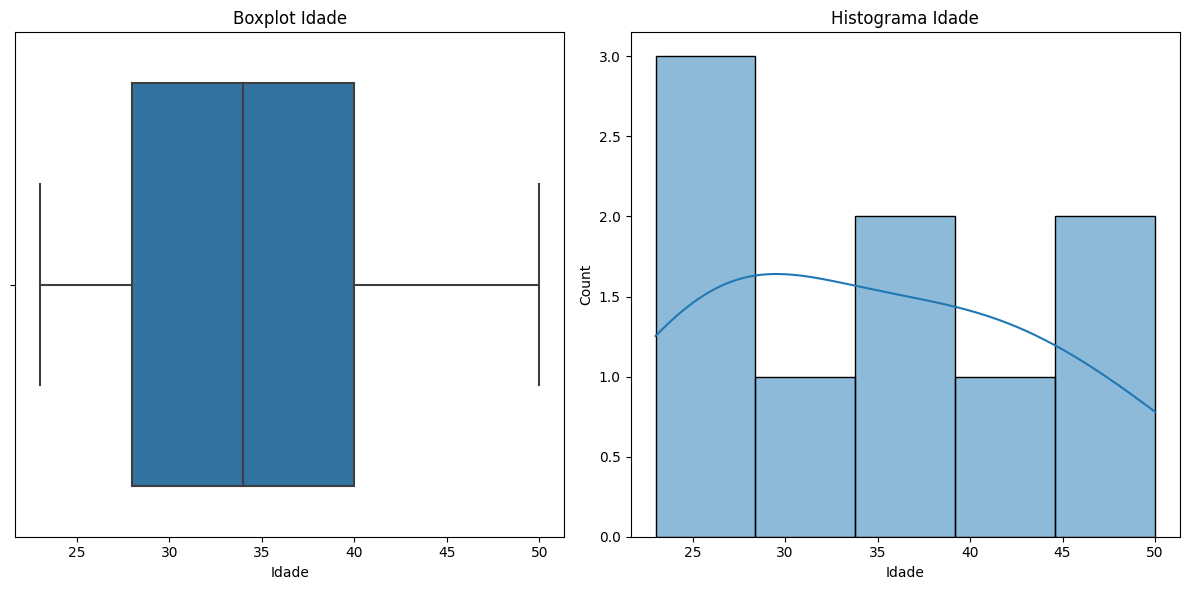

Resumo estatístico da variável Idade:
count     9.000000
mean     34.777778
std       9.324400
min      23.000000
25%      28.000000
50%      34.000000
75%      40.000000
max      50.000000
Name: Idade, dtype: float64


In [16]:
verific(df1, 'Idade', bins=5)

Como o conjunto de dados não apresenta outliers, as métricas de tendência central estão próximas entre si e há apenas um valor a ser substituído, podemos utilizar a média para preencher o valor ausente.

In [17]:
# Substituindo o valor:
df1['Idade'] = df1['Idade'].fillna(df1['Idade'].mean())

In [18]:
df1['Idade'].isnull().sum()

0

### Trantando os valores faltantes da variável Renda Anual (R$)

In [19]:
df1.head()

,Cliente ID,Idade,Gênero,Renda Anual (R$),Localização,Compras Anteriores,Resposta à Campanha
0,1,25.0,Feminino,45000.0,São Paulo,3.0,Sim
1,2,34.0,Masculino,60000.0,Rio de Janeiro,5.0,Não
2,3,28.0,Feminino,NaN,São Paulo,2.0,Sim
3,4,45.0,Masculino,45000.0,Belo Horizonte,NaN,Não
4,5,39.0,NaN,80000.0,Salvador,7.0,Sim


Percentual de valores faltantes na variável Renda Anual (R$): 20.0%


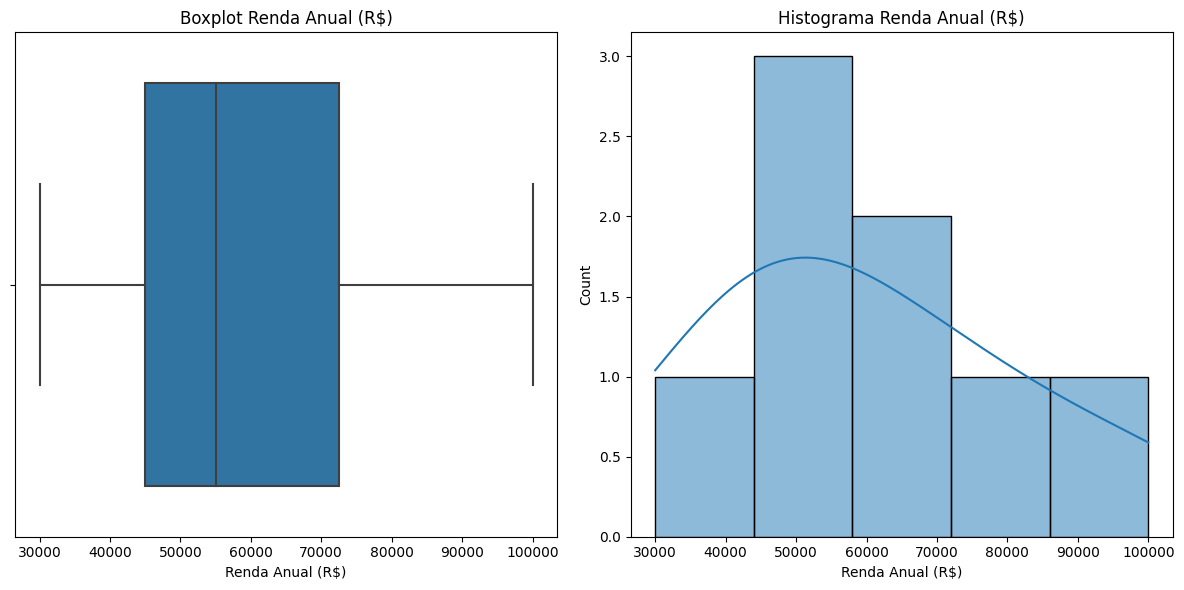

Resumo estatístico da variável Renda Anual (R$):
count         8.000000
mean      60000.000000
std       22519.832529
min       30000.000000
25%       45000.000000
50%       55000.000000
75%       72500.000000
max      100000.000000
Name: Renda Anual (R$), dtype: float64


In [20]:
verific(df1, 'Renda Anual (R$)', bins=5)

In [21]:
# Substituindo o valor:
df1['Renda Anual (R$)'] = df1['Renda Anual (R$)'].fillna(df1['Renda Anual (R$)'].mean())

In [22]:
df1['Renda Anual (R$)'].isnull().sum()

0

### Trantando os valores faltantes da variável Compras Anteriores

Percentual de valores faltantes na variável Compras Anteriores: 10.0%


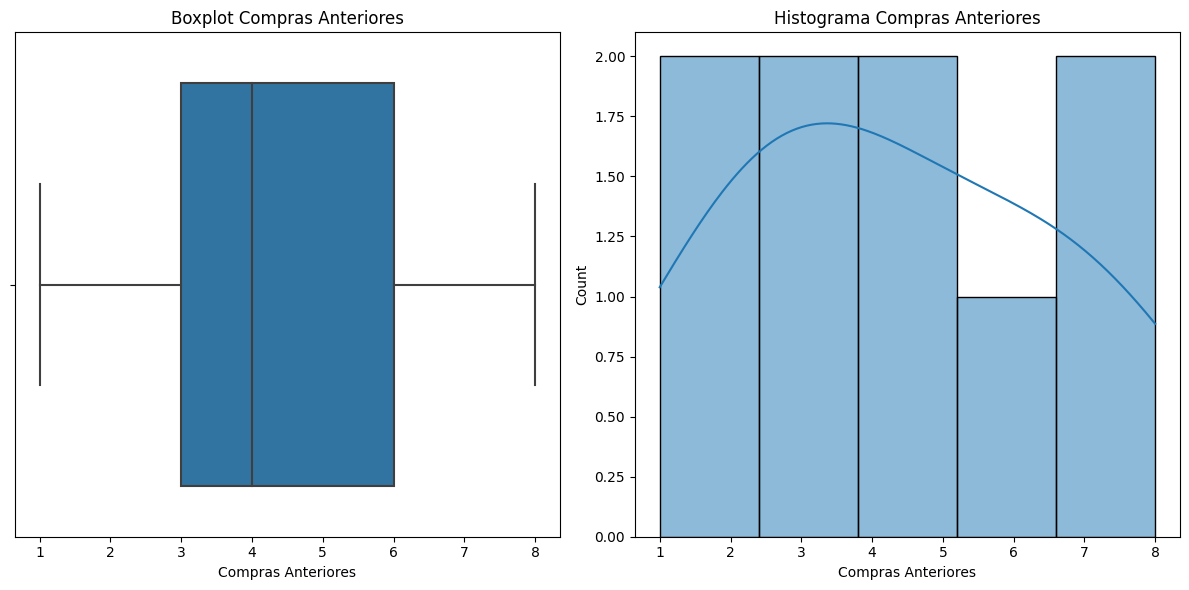

Resumo estatístico da variável Compras Anteriores:
count    9.000000
mean     4.333333
std      2.345208
min      1.000000
25%      3.000000
50%      4.000000
75%      6.000000
max      8.000000
Name: Compras Anteriores, dtype: float64


In [23]:
verific(df1, 'Compras Anteriores', bins=5)

In [24]:
# Substituindo o valor:
df1['Compras Anteriores'] = df1['Compras Anteriores'].fillna(df1['Compras Anteriores'].mean())

In [25]:
df1['Compras Anteriores'].isnull().sum()

0

### Observação

Nas variáveis anteriores, a função SimpleImputer também poderia ser utilizada diretamente. No entanto, é sempre importante analisar o estado de cada variável para garantir que a imputação seja benéfica para a solução do problema.


In [ ]:
# Preenchendo valores faltantes com SimpleImputer:
#imputer_num = SimpleImputer(strategy='mean')
#df[['Idade', 'Renda Anual (R$)', 'Compras Anteriores']] = imputer_num.fit_transform(df[['Idade', 'Renda Anual (R$)', 'Compras Anteriores']])

### Trantando os valores faltantes da variável Gênero

In [26]:
df1['Gênero'].dtype

dtype('O')

Como se trata de uma variável categórica, pode ser interessante considerar outro procedimento de imputação, como a previsão desses valores. No entanto, é importante levar em conta que a quantidade de amostras no conjunto de dados é baixa.

In [27]:
df1['Gênero'].isnull().sum()

1

In [ ]:
# Apenas a variável 

In [28]:
# Criando uma cópia dos dados
df1_predic_genero = df1.copy()

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cliente ID           10 non-null     int64  
 1   Idade                10 non-null     float64
 2   Gênero               9 non-null      object 
 3   Renda Anual (R$)     10 non-null     float64
 4   Localização          10 non-null     object 
 5   Compras Anteriores   10 non-null     float64
 6   Resposta à Campanha  10 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 692.0+ bytes


In [30]:
# Codificando variáveis categóricas
le = LabelEncoder()
df1_predic_genero['Localização'] = le.fit_transform(df1_predic_genero['Localização'])
df1_predic_genero['Resposta à Campanha'] = le.fit_transform(df1_predic_genero['Resposta à Campanha'])

In [31]:
# Separando os dados em treinamento e teste, sem a coluna 'Gênero'
df_train = df1_predic_genero[df1_predic_genero['Gênero'].notna()]
df_missing = df1_predic_genero[df1_predic_genero['Gênero'].isna()]

In [32]:
# X_train são as variáveis independentes, y_train é a variável dependente 'Gênero'
X_train = df_train.drop(['Cliente ID', 'Gênero'], axis=1)
y_train = df_train['Gênero']

In [33]:
# Treinando o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Prevendo os valores faltantes
X_missing = df_missing.drop(['Cliente ID', 'Gênero'], axis=1)
predictions = model.predict(X_missing)

In [35]:
predictions

array(['Feminino'], dtype=object)

In [36]:
# Preenchendo os valores de Gênero no dataframe original
df1.loc[df1['Gênero'].isna(), 'Gênero'] = predictions

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cliente ID           10 non-null     int64  
 1   Idade                10 non-null     float64
 2   Gênero               10 non-null     object 
 3   Renda Anual (R$)     10 non-null     float64
 4   Localização          10 non-null     object 
 5   Compras Anteriores   10 non-null     float64
 6   Resposta à Campanha  10 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 692.0+ bytes


## Verificação de Outliers

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cliente ID           10 non-null     int64  
 1   Idade                10 non-null     float64
 2   Gênero               10 non-null     object 
 3   Renda Anual (R$)     10 non-null     float64
 4   Localização          10 non-null     object 
 5   Compras Anteriores   10 non-null     float64
 6   Resposta à Campanha  10 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 692.0+ bytes


## Tratamento das variáveis categóricas
Como o objetivo da atividade é preparar os dados para uma aplicação em um determinado modelo, a etapa de análise e visualização dos dados será desconsiderada, dando prosseguimento diretamente ao pré-processamento.
- Gênero
- Localização
- Resposta à Campanha

In [49]:
df1.shape

(10, 7)

In [42]:
df1_encoded = df1.copy()

## Tratamento da variável Gênero
Para a variável Genêro será tratada com a técnica one hot encoding

In [43]:
# Aplicando One Hot Encoding
df1_encoded = pd.get_dummies(df1_encoded, columns=['Gênero'])

In [45]:
df1_encoded.head()

,Cliente ID,Idade,Renda Anual (R$),Localização,Compras Anteriores,Resposta à Campanha,Gênero_Feminino,Gênero_Masculino
0,1,25.0,45000.0,São Paulo,3.000000,Sim,1,0
1,2,34.0,60000.0,Rio de Janeiro,5.000000,Não,0,1
2,3,28.0,60000.0,São Paulo,2.000000,Sim,1,0
3,4,45.0,45000.0,Belo Horizonte,4.333333,Não,0,1
4,5,39.0,80000.0,Salvador,7.000000,Sim,1,0


## Tratamento da variável Localização
Para a variável Localização será tratada com a técnica one hot encoding

In [40]:
df1['Localização'].value_counts()

São Paulo         3
Rio de Janeiro    2
Belo Horizonte    2
Salvador          1
Porto Alegre      1
Curitiba          1
Name: Localização, dtype: int64

In [46]:
# Aplicando One Hot Encoding
df1_encoded = pd.get_dummies(df1_encoded, columns=['Localização'])

In [47]:
df1_encoded.head()

,Cliente ID,Idade,Renda Anual (R$),Compras Anteriores,Resposta à Campanha,Gênero_Feminino,Gênero_Masculino,Localização_Belo Horizonte,Localização_Curitiba,Localização_Porto Alegre,Localização_Rio de Janeiro,Localização_Salvador,Localização_São Paulo
0,1,25.0,45000.0,3.000000,Sim,1,0,0,0,0,0,0,1
1,2,34.0,60000.0,5.000000,Não,0,1,0,0,0,1,0,0
2,3,28.0,60000.0,2.000000,Sim,1,0,0,0,0,0,0,1
3,4,45.0,45000.0,4.333333,Não,0,1,1,0,0,0,0,0
4,5,39.0,80000.0,7.000000,Sim,1,0,0,0,0,0,1,0


## Tratamento da variável Resposta à Campanha
Para a variável Resposta à Campanha será tratada com a técnica Label encoding

In [41]:
df1['Resposta à Campanha'].value_counts()

Sim    6
Não    4
Name: Resposta à Campanha, dtype: int64

In [51]:
encoder = LabelEncoder()
df1_encoded['Resposta à Campanha'] = encoder.fit_transform(df1_encoded['Resposta à Campanha'])

In [52]:
df1_encoded.head()

,Cliente ID,Idade,Renda Anual (R$),Compras Anteriores,Resposta à Campanha,Gênero_Feminino,Gênero_Masculino,Localização_Belo Horizonte,Localização_Curitiba,Localização_Porto Alegre,Localização_Rio de Janeiro,Localização_Salvador,Localização_São Paulo
0,1,25.0,45000.0,3.000000,1,1,0,0,0,0,0,0,1
1,2,34.0,60000.0,5.000000,0,0,1,0,0,0,1,0,0
2,3,28.0,60000.0,2.000000,1,1,0,0,0,0,0,0,1
3,4,45.0,45000.0,4.333333,0,0,1,1,0,0,0,0,0
4,5,39.0,80000.0,7.000000,1,1,0,0,0,0,0,1,0


In [53]:
df1_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cliente ID                  10 non-null     int64  
 1   Idade                       10 non-null     float64
 2   Renda Anual (R$)            10 non-null     float64
 3   Compras Anteriores          10 non-null     float64
 4   Resposta à Campanha         10 non-null     int32  
 5   Gênero_Feminino             10 non-null     uint8  
 6   Gênero_Masculino            10 non-null     uint8  
 7   Localização_Belo Horizonte  10 non-null     uint8  
 8   Localização_Curitiba        10 non-null     uint8  
 9   Localização_Porto Alegre    10 non-null     uint8  
 10  Localização_Rio de Janeiro  10 non-null     uint8  
 11  Localização_Salvador        10 non-null     uint8  
 12  Localização_São Paulo       10 non-null     uint8  
dtypes: float64(3), int32(1), int64(1), uin

# Removendo Features que não apresentam uma lógica para o problema

In [54]:
df1_encoded = df1_encoded.drop(columns='Cliente ID', axis=1)

# Realizando a divisão dos dados em X e y

A divisão dos dados é importante ser realizando antes de um tratamento de escalonamento dos dados ou centralização.

In [55]:
X = df1_encoded.drop(columns='Resposta à Campanha', axis=1)
y = df1_encoded['Resposta à Campanha']

In [56]:
# Dividindo em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

## Tratamento da escala dos Dados

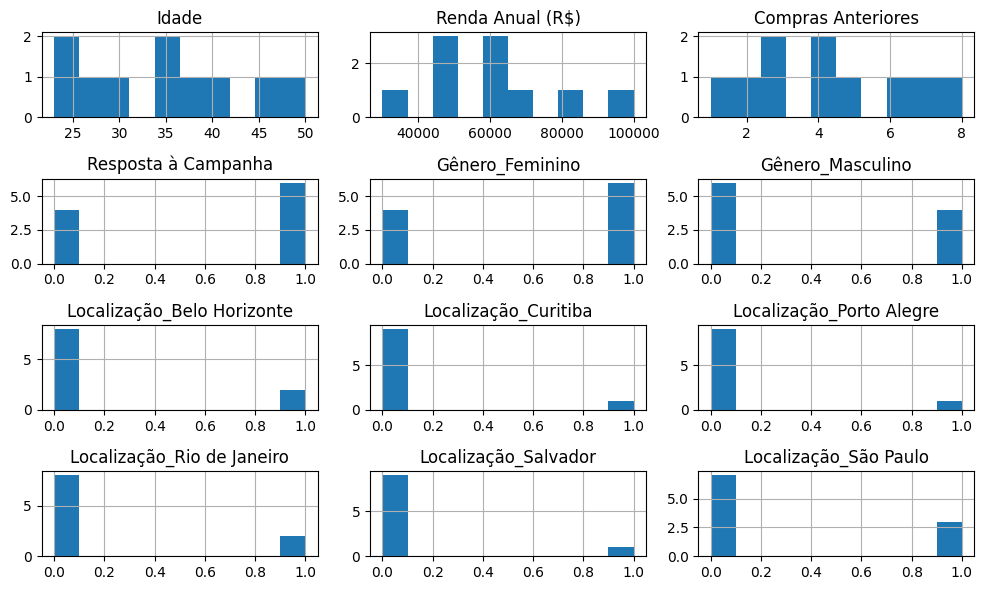

In [58]:
# Plotando histogramas para todas as colunas numéricas
df1_encoded.hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [62]:
df1_transform = X.copy()

In [65]:
# Aplicando a transformação logarítmica
df1_transform = df1_encoded.apply(lambda x: np.log(x + 1) if x.dtype != 'object' else x)  # Adiciona 1 para evitar log(0)

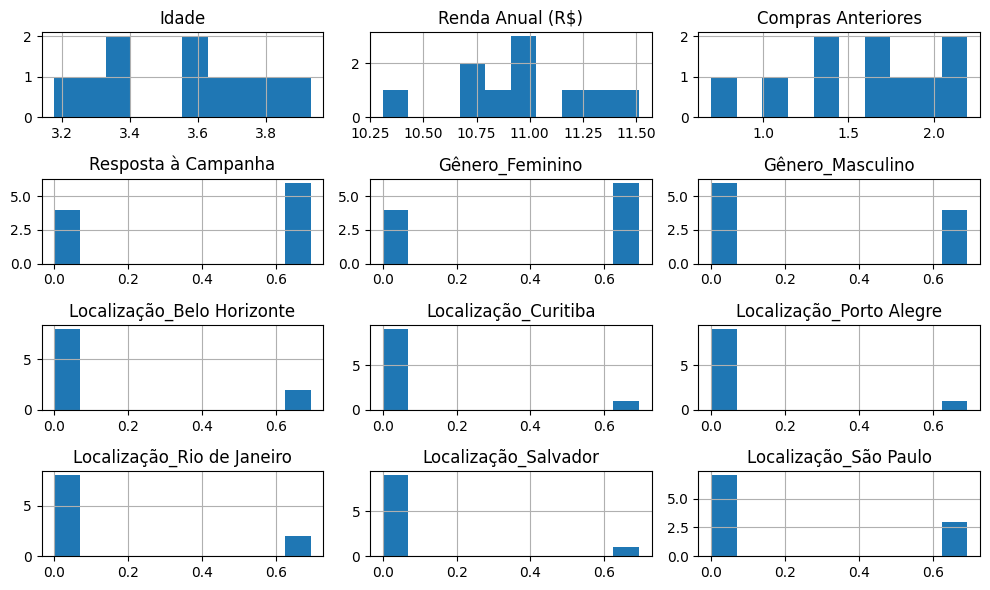

In [66]:
# Plotando histogramas para todas as colunas numéricas
df1_transform.hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [67]:
# Passo 2: Centralizando as variáveis (subtraindo a média)
df1_transform = df1_transform.apply(lambda x: x - x.mean())

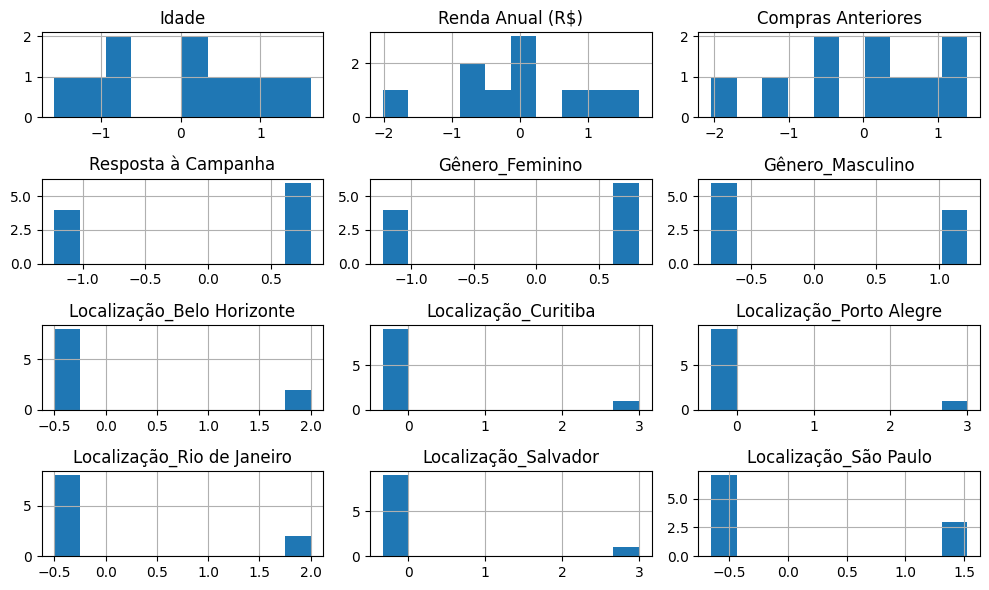

In [76]:
# Plotando histogramas para todas as colunas numéricas
df1_transform.hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [70]:
from sklearn.preprocessing import StandardScaler
# Passo 3: Opcional: Padronizando as variáveis (se for necessário para alguns modelos)
scaler = StandardScaler()
df1_transform = scaler.fit_transform(df1_transform)


In [74]:
# Convertendo o array de volta para DataFrame
df1_transform = pd.DataFrame(df1_transform, columns=df1_encoded.columns)

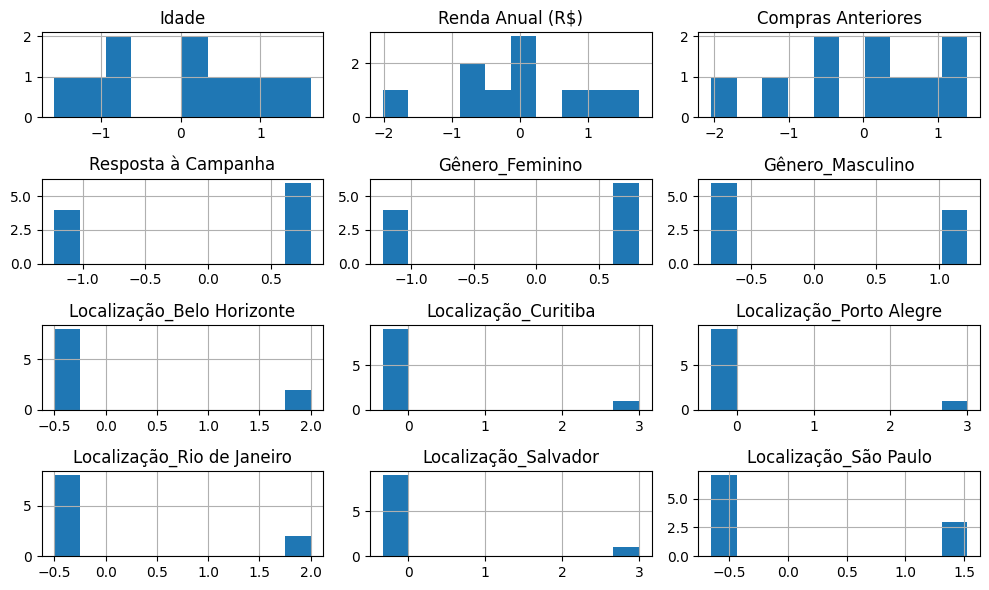

In [75]:
# Plotando histogramas para todas as colunas numéricas
df1_transform.hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

# Dividindo em treino e teste:
X_train, X_test, y_train, y_test = train_test_split